<a href="https://colab.research.google.com/github/hui09241/Windows-Programming-final-topic/blob/master/%E6%B8%AC%E5%88%86%E7%BE%A40901_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 安裝必要

In [ ]:
!pip install pydrive
!pip install scikit-learn==0.20.0
!pip show scikit-learn # to see which version and where scikit-learn is installed
!pip freeze # to see all packages installed in the active virtualenv
"import sklearn; sklearn.show_versions()"

     |████████████████████████████████| 5.3MB 2.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Name: scikit-learn
Version: 0.20.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, scipy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute
absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.1.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.48
botocore==1.17.48
Bottleneck=

'import sklearn; sklearn.show_versions()'

# 資料處理




In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization #這行milk02.ipynb
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error  #02.ipynb

import pandas as pd
from pydrive.auth import GoogleAuth #雲端部分#載入資料用
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

#把要one hot的類別轉換成數字                           #從這以下milk02.ipynb
from sklearn.preprocessing import LabelEncoder

#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.optimizers import Adam

from sklearn.model_selection import KFold

In [ ]:
##載入new_train
auth.authenticate_user()                  
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '11jLvYsp8RkDqZioXL5j2Qitx7C2lwM79'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('our_new_train.csv')
new_train = pd.read_csv('our_new_train.csv', sep=',')
new_train

,Unnamed: 0,ID,firm,CowID,MomID,DadID,BabyNum,FeedDay,Milk,Sampling date,Age,BreedNum,Temperature,T Max,RH,RHMin,Precp,THI,cycle,tcalving number,disease,Sampling D Year,Sampling D Month
0,0,10806,2,3126105,116686.0,1H8784,1,55,20.0,2016/7/26,30,2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10950,2,3126118,116438.0,200H4779,2,62,43.0,2017/4/17,38,1,28.8,34.9,79.0,51.0,0.0,27.093337,NaN,NaN,NaN,NaN,NaN
2,2,30007,2,3126179,99116633.0,200HO4779,1,11,24.0,2016/11/23,27,0,21.8,23.8,93.0,85.0,24.5,21.498437,NaN,NaN,NaN,NaN,NaN
3,3,2137,1,2052011,41323.0,501H8658,2,290,18.2,2018/3/8,57,7,12.0,15.7,91.0,68.0,26.5,12.100133,NaN,NaN,NaN,NaN,NaN
4,4,20955,2,127993,98111275.0,007HO08361,2,156,10.0,2016/2/22,55,1,17.7,20.2,95.0,86.0,0.0,17.597478,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30009,30009,25883,2,10837415,99999999.0,99999996,1,216,24.0,2018/10/23,33,1,24.6,27.9,91.0,67.0,0.0,24.074355,NaN,NaN,NaN,NaN,NaN
30010,30010,19848,2,124308,95110546.0,1H7235,1,37,20.4,2013/12/29,26,0,13.3,16.2,74.0,61.0,0.0,13.401030,NaN,NaN,NaN,NaN,NaN
30011,30011,3360,1,1051856,96040548.0,7H9502,1,73,19.0,2015/8/10,34,0,28.8,34.1,69.0,38.0,0.0,26.279941,NaN,NaN,NaN,NaN,NaN
30012,30012,24966,2,5125677,2111135.0,005HO53812,1,327,NaN,2019/1/17,35,4,15.6,17.8,NaN,76.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##載入new_test
auth.authenticate_user()                  
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1pQC3R9smKnmsqQEU3BUoWVmEk7YRK5Io'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('newtest17.csv')
new_test = pd.read_csv('newtest17.csv', sep=',')
#print(new_test.loc[[48]])
new_test

,Unnamed: 0,ID,firm,CowID,MomID,DadID,BabyNum,FeedDay,Milk,Sampling date,Age,BreedNum,Temperature,T Max,T Min,RH,RHMin,Precp,THI,cycle,tcalving number,disease,Sampling D Year,Sampling D Month
0,0,18072,2,122630,98111436.0,007HO08361,3,183,40.0,2017/1/19,70,2,20.8,25.5,NaN,85.0,69.0,0.0,20.236278,NaN,NaN,NaN,NaN,NaN
1,1,15357,2,2122398,98111423.0,7H7536,3,71,28.0,2017/7/18,50,0,NaN,35.2,NaN,82.0,69.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37069,3,99183211,94172172.0,1H8328,1,365,12.0,2013/6/25,38,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17574,2,122607,98115809.0,029HO11295,4,177,35.0,2017/3/20,73,1,24.3,29.1,NaN,81.0,65.0,0.0,23.221440,NaN,NaN,NaN,NaN,NaN
4,4,3256,1,1051850,96040547.0,7H9502,1,42,28.8,2015/2/5,28,0,10.4,11.1,NaN,71.0,55.0,3.5,10.980262,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7497,7497,23863,2,99127667,NaN,200H1715,2,508,10.0,2014/7/21,52,4,31.5,34.8,NaN,72.0,54.0,0.0,28.814617,NaN,NaN,NaN,NaN,NaN
7498,7498,24192,2,97124147,NaN,7H6155,3,158,30.6,2013/5/27,62,1,29.3,34.4,NaN,75.0,51.0,0.0,27.200232,NaN,NaN,NaN,NaN,NaN
7499,7499,2115,1,2052010,98040660.0,7H9222,3,141,NaN,2019/5/7,71,1,17.9,19.1,NaN,85.0,74.0,6.5,17.575992,NaN,NaN,NaN,NaN,NaN
7500,7500,14623,2,2122364,95110600.0,29H10124,1,9,20.0,2014/12/25,22,0,16.9,19.5,NaN,80.0,60.0,5.5,16.578618,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1TgijKpsq6haP2C6yHsA7_bVtf5Ra6Cps'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('spec01.csv')
spec = pd.read_csv('spec01.csv',sep=',')
#print(spec)

In [ ]:
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str("A")):
          spec['7'][i]=1
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str('B')):
          spec['7'][i]=2
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str('C')):
          spec['7'][i]=3
#spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
new_train=pd.DataFrame(data=new_train,columns=['ID','firm','CowID','MomID','DadID','BabyNum','FeedDay','Milk','Sampling date','Age','BreedNum','Temperature','T Max','RH','RHMin','Precp','THI','cycle','tcalving number','disease','Sampling D Year','Sampling D Month'])
#new_train

In [ ]:
new_test=pd.DataFrame(data=new_test,columns=['ID','firm','CowID','MomID','DadID','BabyNum','FeedDay','Milk','Sampling date','Age','BreedNum','Temperature','T Max','RH','RHMin','Precp','THI','cycle','tcalving number','disease','Sampling D Year','Sampling D Month'])
#new_test

In [ ]:
new_train['Milk']

0        20.0
1        43.0
2        24.0
3        18.2
4        10.0
         ... 
30009    24.0
30010    20.4
30011    19.0
30012     NaN
30013    25.5
Name: Milk, Length: 30014, dtype: float64

In [ ]:
import math
bool = False
for i in range(len(new_train['Milk'])):
    bool = False
    bool=math.isnan(new_train['Milk'][i])
    if(bool):
       new_train['Milk'][i]=0
#print(new_train['Milk'].loc[[15]])
#print(new_train['Milk'].loc[[16]])
#new_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
import math
bool = False
for i in range(len(new_test['Milk'])):
    bool = False
    bool=math.isnan(new_test['Milk'][i])
    if(bool):
       new_test['Milk'][i]=0
#print(new_train['Milk'].loc[[15]])
#print(new_test['Milk'].loc[[9]])
#new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#train有不需要判斷的編號就去掉
for i in range(len(new_test['CowID'])):
    if len(new_train.index[new_train['CowID'] == new_test['CowID'][i]]) == 0:
        new_train=new_train.drop([i])
new_train.reset_index(inplace=True)
#new_train

In [ ]:
#train牛乳產量是0，則丟棄不用
for i in range(len(new_train['Milk'])): 
    if new_train['Milk'][i] == 0 :
        new_train = new_train.drop([i])
new_train.reset_index(inplace=True)
#new_train

In [ ]:
#test牛乳產量是0，則丟棄不用(未來測試需要)
for i in range(len(new_test['Milk'])): 
    if new_test['Milk'][i] == 0 :
        new_test = new_test.drop([i])
new_test.reset_index(inplace=True)
print(new_test['Milk'].loc[[9]])
new_test

9    11.6
Name: Milk, dtype: float64


,index,ID,firm,CowID,MomID,DadID,BabyNum,FeedDay,Milk,Sampling date,Age,BreedNum,Temperature,T Max,RH,RHMin,Precp,THI,cycle,tcalving number,disease,Sampling D Year,Sampling D Month
0,0,18072,2,122630,98111436.0,007HO08361,3,183,40.0,2017/1/19,70,2,20.8,25.5,85.0,69.0,0.0,20.236278,NaN,NaN,NaN,NaN,NaN
1,1,15357,2,2122398,98111423.0,7H7536,3,71,28.0,2017/7/18,50,0,NaN,35.2,82.0,69.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37069,3,99183211,94172172.0,1H8328,1,365,12.0,2013/6/25,38,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17574,2,122607,98115809.0,029HO11295,4,177,35.0,2017/3/20,73,1,24.3,29.1,81.0,65.0,0.0,23.221440,NaN,NaN,NaN,NaN,NaN
4,4,3256,1,1051850,96040547.0,7H9502,1,42,28.8,2015/2/5,28,0,10.4,11.1,71.0,55.0,3.5,10.980262,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6678,7496,11987,2,1123347,99116307.0,7H8361,3,18,39.0,2015/8/20,42,0,31.0,34.9,82.0,61.0,0.0,29.323086,NaN,NaN,NaN,NaN,NaN
6679,7497,23863,2,99127667,NaN,200H1715,2,508,10.0,2014/7/21,52,4,31.5,34.8,72.0,54.0,0.0,28.814617,NaN,NaN,NaN,NaN,NaN
6680,7498,24192,2,97124147,NaN,7H6155,3,158,30.6,2013/5/27,62,1,29.3,34.4,75.0,51.0,0.0,27.200232,NaN,NaN,NaN,NaN,NaN
6681,7500,14623,2,2122364,95110600.0,29H10124,1,9,20.0,2014/12/25,22,0,16.9,19.5,80.0,60.0,5.5,16.578618,NaN,NaN,NaN,NaN,NaN


In [ ]:
#處理new_train的
#父親精液編號 
new_train['DadID']=new_train['DadID'].fillna("NoData").astype("str")

#將MomID中沒有編號的打為NoData 
new_train['MomID']=new_train['MomID'].fillna("NoData").astype("str")

avg_Temperature_tr=new_train['Temperature'].mean() #將平均溫度Nan部分以算術平均數之平均溫度取代
new_train['Temperature']= new_train['Temperature'].fillna(avg_Temperature_tr)


avg_T_Max_tr=new_train['T Max'].mean()          #將最高溫度Nan部分以算術平均數之最高溫度取代
new_train['T Max']= new_train['T Max'].fillna(avg_T_Max_tr)


avg_RH_tr=new_train['RH'].mean()                  #將相對濕度Nan部分以算術平均數之相對濕度取代
new_train['RH']= new_train['RH'].fillna(avg_RH_tr)


avg_RH_Min_tr=new_train['RHMin'].mean()         #將最小相對濕度Nan部分以算術平均數之最小相對濕度取代
new_train['RHMin']= new_train['RHMin'].fillna(avg_RH_Min_tr)


avg_Precp_tr=new_train['Precp'].mean()          #將降水量Nan部分以算術平均數之降水量取代
new_train['Precp']= new_train['Precp'].fillna(avg_Precp_tr)

avg_THI_tr=new_train['THI'].mean()          #將THI Nan部分以算術平均數之THI取代
new_train['THI']= new_train['THI'].fillna(avg_THI_tr)

new_train.dropna(subset=['FeedDay','DadID','MomID'], inplace=True)
#new_train

In [ ]:
#處理new_test的
#父親精液編號
new_test['DadID']=new_test['DadID'].fillna("NoData").astype("str")

#將MomID中沒有編號的打為NoData 
new_test['MomID']=new_test['MomID'].fillna("NoData").astype("str")

avg_Temperature=new_test['Temperature'].mean() #將平均溫度Nan部分以算術平均數之平均溫度取代
new_test['Temperature']= new_test['Temperature'].fillna(avg_Temperature)


avg_T_Max=new_test['T Max'].mean()          #將最高溫度Nan部分以算術平均數之最高溫度取代
new_test['T Max']= new_test['T Max'].fillna(avg_T_Max)


avg_RH=new_test['RH'].mean()                  #將相對濕度Nan部分以算術平均數之相對濕度取代
new_test['RH']= new_test['RH'].fillna(avg_RH)


avg_RH_Min=new_test['RHMin'].mean()         #將最小相對濕度Nan部分以算術平均數之最小相對濕度取代
new_test['RHMin']= new_test['RHMin'].fillna(avg_RH_Min)


avg_Precp=new_test['Precp'].mean()          #將降水量Nan部分以算術平均數之降水量取代
new_test['Precp']= new_test['Precp'].fillna(avg_Precp)

avg_THI=new_test['THI'].mean()          #將THI Nan部分以算術平均數之THI取代
new_test['THI']= new_test['THI'].fillna(avg_THI)
#
#new_test


In [ ]:
from datetime import datetime
for i in range(len(new_train['Sampling date'])):
          sdate=datetime.strptime(new_train['Sampling date'][i], "%Y/%m/%d")
          new_train['Sampling D Year'][i]= sdate.year
          new_train['Sampling D Month'][i]= sdate.month
#new_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
for i in range(len(new_test['Sampling date'])):
          sdate=datetime.strptime(new_test['Sampling date'][i], "%Y/%m/%d")
          new_test['Sampling D Year'][i]= sdate.year
          new_test['Sampling D Month'][i]= sdate.month
#new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#new_train把當月有病的標記起來(為1)
for i in range(len(spec)):
    dd=datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(new_train.index[new_train['CowID'] == spec['1'][i]])>0:
        for j in new_train.index[new_train['CowID'] == spec['1'][i]]:
            if new_train['Sampling D Year'][j] == dd.year and new_train['Sampling D Month'][j] == dd.month and new_train['firm'][j]==spec['7'][i]:
                new_train['disease'][j] = 1
                #print(j,new_train['CowID'][j],new_train['Sampling D Year'][j],new_train['Sampling D Month'][j])

#new_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#new_test把當月有病的標記起來(為1)
for i in range(len(spec)):
    dd=datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(new_test.index[new_test['CowID'] == spec['1'][i]])>0:
        for j in new_test.index[new_test['CowID'] == spec['1'][i]]:
            if new_test['Sampling D Year'][j] == dd.year and new_test['Sampling D Month'][j] == dd.month and new_test['firm'][j]==spec['7'][i]:
                new_test['disease'][j] = 1
                #print(j,new_test['CowID'][j],new_test['Sampling D Year'][j],new_test['Sampling D Month'][j])

#new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)
new_train.reset_index(inplace=True,drop=True)

In [ ]:
#改new_train
i=0
for i in range(len(new_train['Sampling D Month'])):
          if int(new_train['Sampling D Month'][i]) >=3 and int(new_train['Sampling D Month'][i])<=5:
              new_train['Sampling D Month'][i] = "Spring"
          elif int(new_train['Sampling D Month'][i]) >=6 and int(new_train['Sampling D Month'][i])<=8:
              new_train['Sampling D Month'][i] = "Summer"
          elif int(new_train['Sampling D Month'][i]) >=9 and int(new_train['Sampling D Month'][i])<=11:
              new_train['Sampling D Month'][i] = "Autumn"
          else:
              new_train['Sampling D Month'][i] = "Winter"   
#改new_train的feedday以及babynum
for i in range(len(new_train['ID'])):
    if int(new_train['FeedDay'][i]) <=100:
        new_train['cycle'][i] = 0
    elif int(new_train['FeedDay'][i]) >=101 and int(new_train['FeedDay'][i]) <=200 :
        new_train['cycle'][i] = 1
    elif int(new_train['FeedDay'][i]) >=201 and int(new_train['FeedDay'][i]) <=305:
        new_train['cycle'][i] = 2
    else:
        new_train['cycle'][i] = 3

    if int(new_train['BabyNum'][i]) <=2:
        new_train['tcalving number'][i] = 0
    elif int(new_train['BabyNum'][i])>=7:
        new_train['tcalving number'][i] = 2
    else:
        new_train['tcalving number'][i] = 1

#new_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykerne

In [ ]:
#改new_test
i=0
for i in range(len(new_test['Sampling D Month'])):
          if int(new_test['Sampling D Month'][i]) >=3 and int(new_test['Sampling D Month'][i])<=5:
              new_test['Sampling D Month'][i] = "Spring"
          elif int(new_test['Sampling D Month'][i]) >=6 and int(new_test['Sampling D Month'][i])<=8:
              new_test['Sampling D Month'][i] = "Summer"
          elif int(new_test['Sampling D Month'][i]) >=9 and int(new_test['Sampling D Month'][i])<=11:
              new_test['Sampling D Month'][i] = "Autumn"
          else:
              new_test['Sampling D Month'][i] = "Winter"
#改new_test的feedday以及babynum
for i in range(len(new_test['ID'])):
    if int(new_test['FeedDay'][i]) <=100:
        new_test['cycle'][i] = 0
    elif int(new_train['FeedDay'][i]) >=101 and int(new_test['FeedDay'][i]) <=200 :
        new_test['cycle'][i] = 1
    elif int(new_test['FeedDay'][i]) >=201 and int(new_test['FeedDay'][i]) <=305:
        new_test['cycle'][i] = 2
    else:
        new_test['cycle'][i] = 2
    if int(new_test['BabyNum'][i]) <=2:
        new_test['tcalving number'][i] = 0
    elif int(new_test['BabyNum'][i])>=7:
        new_test['tcalving number'][i] = 2
    else:
        new_test['tcalving number'][i] = 1    
#new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impor

In [ ]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [ ]:
y_fortest=new_test['Milk']
y_fortest

0       40.0
1       28.0
2       12.0
3       35.0
4       28.8
        ... 
6678    39.0
6679    10.0
6680    30.6
6681    20.0
6682    16.0
Name: Milk, Length: 6683, dtype: float64

In [ ]:
y=new_train['Milk']
y

0        20.0
1        43.0
2        24.0
3        18.2
4        10.0
         ... 
26475    33.0
26476    24.0
26477    20.4
26478    19.0
26479    25.5
Name: Milk, Length: 26480, dtype: float64

# Label encoding

In [ ]:
new_train_backup = new_train
new_test_backup = new_test

In [ ]:
#挑選靠賽要訓練的資料
new_train=pd.DataFrame(data=new_train_backup,columns=['firm','CowID','BabyNum','FeedDay','Age','BreedNum','T Max','THI','disease','Sampling D Month'])
#new_train

In [ ]:
new_test=pd.DataFrame(data=new_test_backup,columns=['firm','CowID','BabyNum','FeedDay','Age','BreedNum','T Max','THI','disease','Sampling D Month'])
#new_test

In [ ]:
#把要one hot的類別轉換成數字
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data=pd.concat([new_train,new_test])
#all_data['3'] = labelencoder.fit_transform(all_data['3'])
all_data['CowID'] = labelencoder.fit_transform(all_data['CowID'])
#all_data['MomID'] = labelencoder.fit_transform(all_data['MomID'])
#all_data['DadID'] = labelencoder.fit_transform(all_data['DadID'])
all_data['Sampling D Month'] = labelencoder.fit_transform(all_data['Sampling D Month'])
new_train = all_data[0:len(new_train)]
new_test = all_data[len(new_train)::]
all_data=pd.concat([new_train,new_test])


In [ ]:
all_data

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
0,2,728,1,55,30,2,27.826169,22.850519,1.0,2
1,2,736,2,62,38,1,34.900000,27.093337,0.0,1
2,2,781,1,11,27,0,23.800000,21.498437,0.0,0
3,1,388,2,290,57,7,15.700000,12.100133,0.0,1
4,2,189,2,156,55,1,20.200000,17.597478,0.0,3
...,...,...,...,...,...,...,...,...,...,...
6678,2,280,3,18,42,0,34.900000,29.323086,0.0,2
6679,2,1790,2,508,52,4,34.800000,28.814617,0.0,2
6680,2,1555,3,158,62,1,34.400000,27.200232,0.0,1
6681,2,466,1,9,22,0,19.500000,16.578618,1.0,3


# 將new_train分群

In [ ]:
group_train=pd.DataFrame(data=new_train,columns=['firm','BabyNum','FeedDay','Age','BreedNum','T Max','THI','disease','Sampling D Month'])
group_train

,firm,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
0,2,1,55,30,2,27.826169,22.850519,1.0,2
1,2,2,62,38,1,34.900000,27.093337,0.0,1
2,2,1,11,27,0,23.800000,21.498437,0.0,0
3,1,2,290,57,7,15.700000,12.100133,0.0,1
4,2,2,156,55,1,20.200000,17.597478,0.0,3
...,...,...,...,...,...,...,...,...,...
26475,2,3,137,60,1,31.900000,27.146230,0.0,1
26476,2,1,216,33,1,27.900000,24.074355,0.0,0
26477,2,1,37,26,0,16.200000,13.401030,0.0,3
26478,1,1,73,34,0,34.100000,26.279941,0.0,2


In [ ]:
group_train=group_train.values

In [ ]:
#plt.scatter(group_train[:,0],group_train[:,1],s=50)
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
#開始訓練！
clf.fit(group_train)

#這樣就可以取得預測結果了！
clf.labels_

#最後畫出來看看
#真的分成三類！太神奇了………無意義的資料也能分～
#plt.scatter(group_train[:,0],group_train[:,1], c=clf.labels_)
lable_pred=clf.labels_
whichGroup_train=pd.DataFrame(data=new_train,columns=['Group'])
i=0
for i in range(len(whichGroup_train['Group'])):
  whichGroup_train['Group'][i]=lable_pred[i]
print(whichGroup_train)

       Group
0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
...      ...
26475    0.0
26476    0.0
26477    0.0
26478    0.0
26479    1.0

[26480 rows x 1 columns]


In [ ]:
zero=0
one=0
two=0
for i in range(len(whichGroup_train['Group'])):
  if whichGroup_train['Group'][i]==0:
    zero=zero+1
  elif whichGroup_train['Group'][i]==1:
    one=one+1
  elif whichGroup_train['Group'][i]==2:
    two=two+1
print(zero)
print(one)
print(two)

17564
8916
0


# 將new_train依照各群分開

In [ ]:
##分出類別0的
classification_zero = new_train
for i in range(len(whichGroup_train['Group'])): 
    if whichGroup_train['Group'][i] != 0 :
        classification_zero = classification_zero.drop([i])
classification_zero

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
0,2,728,1,55,30,2,27.826169,22.850519,1.0,2
1,2,736,2,62,38,1,34.900000,27.093337,0.0,1
2,2,781,1,11,27,0,23.800000,21.498437,0.0,0
4,2,189,2,156,55,1,20.200000,17.597478,0.0,3
5,2,297,3,58,58,0,21.800000,19.043600,0.0,3
...,...,...,...,...,...,...,...,...,...,...
26474,1,6,2,121,54,1,34.100000,26.279941,0.0,2
26475,2,495,3,137,60,1,31.900000,27.146230,0.0,1
26476,2,1313,1,216,33,1,27.900000,24.074355,0.0,0
26477,2,149,1,37,26,0,16.200000,13.401030,0.0,3


In [ ]:
##分出類別1的
classification_one = new_train
for i in range(len(whichGroup_train['Group'])): 
    if whichGroup_train['Group'][i] != 1 :
        classification_one = classification_one.drop([i])
classification_one

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
3,1,388,2,290,57,7,15.7,12.100133,0.0,1
8,2,325,1,305,33,5,35.9,28.220560,0.0,2
11,2,526,1,376,39,4,25.5,20.236278,0.0,3
12,2,427,3,325,73,3,33.1,27.836711,0.0,2
16,2,315,3,293,71,1,34.8,28.960620,0.0,2
...,...,...,...,...,...,...,...,...,...,...
26449,1,398,1,340,47,3,32.1,25.864153,0.0,2
26453,1,607,1,644,57,8,26.0,21.637700,0.0,0
26462,3,215,1,298,33,1,24.5,18.595894,0.0,3
26466,2,1563,2,353,59,3,34.4,27.200232,0.0,1


In [ ]:
##分出類別2的
classification_two = new_train
for i in range(len(whichGroup_train['Group'])): 
    if whichGroup_train['Group'][i] != 2 :
        classification_two = classification_two.drop([i])
classification_two

# 將train_milk依照各群分開

In [ ]:
##分出類別0的牛奶
classification_zero_milk = y
for i in range(len(whichGroup_train['Group'])): 
    if whichGroup_train['Group'][i] != 0 :
        classification_zero_milk = classification_zero_milk.drop([i])
classification_zero_milk

0        20.0
1        43.0
2        24.0
4        10.0
5        41.0
         ... 
26474    35.0
26475    33.0
26476    24.0
26477    20.4
26478    19.0
Name: Milk, Length: 17564, dtype: float64

In [ ]:
##分出類別1的牛奶
classification_one_milk = y
for i in range(len(whichGroup_train['Group'])): 
    if whichGroup_train['Group'][i] != 1 :
        classification_one_milk = classification_one_milk.drop([i])
classification_one_milk

3        18.2
8        18.0
11       21.0
12       10.0
16       25.0
         ... 
26449    22.5
26453    18.0
26462    14.0
26466    13.6
26479    25.5
Name: Milk, Length: 8916, dtype: float64

In [ ]:
##分出類別2的牛奶
classification_two_milk = y
for i in range(len(whichGroup_train['Group'])): 
    if whichGroup_train['Group'][i] != 2 :
        classification_two_milk = classification_two_milk.drop([i])
classification_two_milk

# 將new_test分群

In [ ]:
group_test=pd.DataFrame(data=new_test,columns=['firm','BabyNum','FeedDay','Age','BreedNum','T Max','THI','disease','Sampling D Month'])
group_test=group_test.values
#plt.scatter(group_test[:,0],group_test[:,1],s=50)
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
#開始訓練！
clf.fit(group_test)

#這樣就可以取得預測結果了！
clf.labels_

#最後畫出來看看
#真的分成三類！太神奇了………無意義的資料也能分～
#plt.scatter(group_test[:,0],group_test[:,1], c=clf.labels_)
lable_pred=clf.labels_
whichGroup_test=pd.DataFrame(data=new_test,columns=['Group'])
i=0
for i in range(len(whichGroup_test['Group'])):
  whichGroup_test['Group'][i]=lable_pred[i]
print(whichGroup_test)

      Group
0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
...     ...
6678    1.0
6679    0.0
6680    1.0
6681    1.0
6682    1.0

[6683 rows x 1 columns]


In [ ]:
test_zero=0
test_one=0
test_two=0
for i in range(len(whichGroup_test['Group'])):
  if whichGroup_test['Group'][i]==0:
    test_zero=test_zero+1
  elif whichGroup_test['Group'][i]==1:
    test_one=test_one+1
  elif whichGroup_test['Group'][i]==2:
    test_two=test_two+1
print(test_zero)
print(test_one)
print(test_two)

2400
4283
0


# 將new_test依照各群分開

In [ ]:
##分出類別0的
classification_zero_test = new_test
for i in range(len(whichGroup_test['Group'])): 
    if whichGroup_test['Group'][i] != 0 :
        classification_zero_test = classification_zero_test.drop([i])
classification_zero_test

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
2,3,1817,1,365,38,5,27.808703,22.838761,0.0,2
6,2,553,2,244,45,2,28.000000,22.310702,0.0,3
7,3,335,3,270,55,2,34.200000,27.980298,0.0,2
9,2,1431,4,393,86,6,16.200000,13.401030,0.0,3
10,2,507,2,275,47,3,35.200000,22.838761,0.0,2
...,...,...,...,...,...,...,...,...,...,...
6672,2,1742,2,244,59,1,33.200000,28.332506,0.0,0
6673,1,12,1,698,50,5,29.600000,23.287839,0.0,1
6675,2,164,1,600,47,7,31.000000,26.344717,0.0,0
6677,2,425,3,300,64,4,22.800000,19.074012,0.0,3


In [ ]:
##分出類別1的
classification_one_test = new_test
for i in range(len(whichGroup_test['Group'])): 
    if whichGroup_test['Group'][i] != 1 :
        classification_one_test = classification_one_test.drop([i])
classification_one_test

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
0,2,96,3,183,70,2,25.5,20.236278,0.0,3
1,2,494,3,71,50,0,35.2,22.838761,0.0,2
3,2,76,4,177,73,1,29.1,23.221440,0.0,1
4,1,250,1,42,28,0,11.1,10.980262,0.0,3
5,2,1662,2,161,45,1,34.4,27.200232,0.0,1
...,...,...,...,...,...,...,...,...,...,...
6676,2,749,1,62,32,0,23.8,21.498437,0.0,0
6678,2,280,3,18,42,0,34.9,29.323086,0.0,2
6680,2,1555,3,158,62,1,34.4,27.200232,0.0,1
6681,2,466,1,9,22,0,19.5,16.578618,1.0,3


In [ ]:
##分出類別2的
classification_two_test = new_test
for i in range(len(whichGroup_test['Group'])): 
    if whichGroup_test['Group'][i] != 2 :
        classification_two_test = classification_two_test.drop([i])
classification_two_test

# 將test_milk依照各群分開

In [ ]:
##分出類別0的牛奶
classification_zero_milk_test = y_fortest
for i in range(len(whichGroup_test['Group'])): 
    if whichGroup_test['Group'][i] != 0 :
        classification_zero_milk_test = classification_zero_milk_test.drop([i])
classification_zero_milk_test

2       12.0
6       35.0
7       14.0
9       11.6
10      25.0
        ... 
6672    13.0
6673    16.0
6675     8.0
6677    10.0
6679    10.0
Name: Milk, Length: 2400, dtype: float64

In [ ]:
##分出類別1的牛奶
classification_one_milk_test = y_fortest
for i in range(len(whichGroup_test['Group'])): 
    if whichGroup_test['Group'][i] != 1 :
        classification_one_milk_test = classification_one_milk_test.drop([i])
classification_one_milk_test

0       40.0
1       28.0
3       35.0
4       28.8
5       43.9
        ... 
6676    29.0
6678    39.0
6680    30.6
6681    20.0
6682    16.0
Name: Milk, Length: 4283, dtype: float64

In [ ]:
##分出類別2的牛奶
classification_two_milk_test = y_fortest
for i in range(len(whichGroup_test['Group'])): 
    if whichGroup_test['Group'][i] != 2:
        classification_two_milk_test = classification_two_milk_test.drop([i])
classification_two_milk_test

# 執行onehotencoding

In [ ]:
#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categorical_features =[0,1,2,5,8,9])#6
enc.fit(all_data)
X_zero=enc.transform(classification_zero).toarray()
X_one=enc.transform(classification_one).toarray()
#X_two=enc.transform(classification_two).toarray()
X_zero_test=enc.transform(classification_zero_test).toarray()
X_one_test=enc.transform(classification_one_test).toarray()
#X_two_test=enc.transform(classification_two_test).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
#測試類別0測試類別0
X_zero.shape

(17564, 1858)

# 正規化類別0訓練model並做預測

In [ ]:
from keras import backend as K
def rmse(y_pred, y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
X_zero = X_zero.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
X_zero = scaler.fit_transform(X_zero)
X_zero

array([[0.        , 1.        , 0.        , ..., 0.1923077 , 0.61618984,
        0.6523535 ],
       [0.        , 1.        , 0.        , ..., 0.24358974, 0.8338462 ,
        0.82666194],
       [0.        , 1.        , 0.        , ..., 0.17307693, 0.49230766,
        0.5968058 ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.21153846, 0.6184615 ,
        0.70263255],
       [0.        , 1.        , 0.        , ..., 0.16666667, 0.25846156,
        0.26413873],
       [1.        , 0.        , 0.        , ..., 0.21794872, 0.8092307 ,
        0.7932451 ]], dtype=float32)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_zero,classification_zero_milk,test_size=0.066,random_state=42)
#random_state為02.ipynb

In [ ]:
print("Please show me the shape of x_train:",x_train.shape)
print("Please show me the shape of x_test:",x_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)

Please show me the shape of x_train: (16404, 1858)
Please show me the shape of x_test: (1160, 1858)
Please show me the shape of y_train: (16404,)
Please show me the shape of y_test: (1160,)


In [ ]:
from sklearn.model_selection import KFold
from keras import regularizers
from matplotlib import pyplot
from keras import optimizers
import keras
from keras.callbacks import ReduceLROnPlateau
print("y_test:") #看
y_test

y_test:


18881    18.0
10633    39.0
16512    21.0
21390    31.4
14565    21.0
         ... 
9226     34.0
17702    48.0
6187     30.0
6003     29.0
5320     27.8
Name: Milk, Length: 1160, dtype: float64

In [ ]:
print("y_train:") #看每次y_train一不一樣
print(y_train)

y_train:
11313    14.0
7835     10.0
10658    23.0
19884    14.0
20697    21.0
         ... 
16975    20.0
17983    29.0
8077     22.0
1318     19.0
23817    29.0
Name: Milk, Length: 16404, dtype: float64


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))#做成三維
x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [ ]:
print("Please show me the shape of x_train:",x_train.shape)
print("Please show me the shape of x_test:",x_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)

Please show me the shape of x_train: (16404, 1, 1858)
Please show me the shape of x_test: (1160, 1, 1858)
Please show me the shape of y_train: (16404,)
Please show me the shape of y_test: (1160,)


In [ ]:
from keras.layers import Embedding, Bidirectional,TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dense
from keras.callbacks import EarlyStopping
model = Sequential()#LSTM
model.add(LSTM(64, input_shape=(1,x_train.shape[2])))
model.add(Dropout(0.5))

model.add(Dense(1))
ADAM=keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=rmse, optimizer=ADAM,metrics=[rmse])
early_stopping=EarlyStopping(monitor='val_loss', patience=10)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history=model.fit(x_train, y_train, epochs=500,validation_data=(x_test, y_test), batch_size=5, verbose=2, callbacks=[early_stopping],shuffle=True)#epochs要改回1000


Epoch 1/500
3281/3281 - 13s - loss: 9.9649 - rmse: 9.9647 - val_loss: 6.6473 - val_rmse: 6.6473
Epoch 2/500
3281/3281 - 13s - loss: 7.2213 - rmse: 7.2212 - val_loss: 6.3645 - val_rmse: 6.3645
Epoch 3/500
3281/3281 - 13s - loss: 6.8588 - rmse: 6.8587 - val_loss: 6.0472 - val_rmse: 6.0472
Epoch 4/500
3281/3281 - 12s - loss: 6.4876 - rmse: 6.4877 - val_loss: 5.7972 - val_rmse: 5.7972
Epoch 5/500
3281/3281 - 13s - loss: 6.1880 - rmse: 6.1884 - val_loss: 5.6773 - val_rmse: 5.6773
Epoch 6/500
3281/3281 - 13s - loss: 6.0796 - rmse: 6.0795 - val_loss: 5.6186 - val_rmse: 5.6186
Epoch 7/500
3281/3281 - 12s - loss: 6.0024 - rmse: 6.0021 - val_loss: 5.5493 - val_rmse: 5.5493
Epoch 8/500
3281/3281 - 13s - loss: 5.9054 - rmse: 5.9054 - val_loss: 5.5278 - val_rmse: 5.5278
Epoch 9/500
3281/3281 - 13s - loss: 5.8224 - rmse: 5.8223 - val_loss: 5.4779 - val_rmse: 5.4779
Epoch 10/500
3281/3281 - 13s - loss: 5.7870 - rmse: 5.7868 - val_loss: 5.4698 - val_rmse: 5.4698
Epoch 11/500
3281/3281 - 13s - loss: 5.

In [ ]:
Predicts_0 = model.predict(x_train)
testScore = math.sqrt(mean_squared_error(y_train, Predicts_0))
print('Train Score: %.2f RMSE' % (testScore))


Train Score: 3.20 RMSE


In [ ]:
Predicts_0

array([[14.8953  ],
       [ 9.858029],
       [23.153492],
       ...,
       [22.264591],
       [18.108892],
       [31.95078 ]], dtype=float32)

In [ ]:
Predict_0 = model.predict(x_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict_0))
print('Validation Score: %.2f RMSE' % (testScore))

Validation Score: 4.92 RMSE


In [ ]:
Predict_0

array([[17.774242],
       [35.583282],
       [21.140295],
       ...,
       [37.07154 ],
       [23.446775],
       [30.726364]], dtype=float32)

In [ ]:
y_train

11313    14.0
7835     10.0
10658    23.0
19884    14.0
20697    21.0
         ... 
16975    20.0
17983    29.0
8077     22.0
1318     19.0
23817    29.0
Name: Milk, Length: 16404, dtype: float64

In [ ]:
y_test

18881    18.0
10633    39.0
16512    21.0
21390    31.4
14565    21.0
         ... 
9226     34.0
17702    48.0
6187     30.0
6003     29.0
5320     27.8
Name: Milk, Length: 1160, dtype: float64

In [ ]:
y_train_0=y_train
for i in range(len(y_train)):
  y_train_0[y_train.index[i]]=Predicts_0[i]

y_train_0

11313    14.895300
7835      9.858029
10658    23.153492
19884    15.180889
20697    21.049278
           ...    
16975    18.916750
17983    27.843340
8077     22.264591
1318     18.108892
23817    31.950781
Name: Milk, Length: 16404, dtype: float64

In [ ]:
y_test_0=y_test
for i in range(len(y_test)):
  y_test_0[y_test.index[i]]=Predict_0[i]

y_test_0

18881    17.774242
10633    35.583282
16512    21.140295
21390    29.213495
14565    20.409357
           ...    
9226     36.003487
17702    42.589310
6187     37.071541
6003     23.446775
5320     30.726364
Name: Milk, Length: 1160, dtype: float64

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                492288    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 492,353
Trainable params: 492,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#X_test=X_test.values
X_zero_test=X_zero_test.astype('float32')
X_zero_test=scaler.transform(X_zero_test)

In [ ]:
X_zero_test.shape

(2400, 1858)

In [ ]:
X_zero_test= np.reshape(X_zero_test,(X_zero_test.shape[0],1,X_zero_test.shape[1]))

In [ ]:
X_zero_test.shape

(2400, 1, 1858)

In [ ]:
Prediction_0 = model.predict(X_zero_test)
Prediction_0

array([[11.967695],
       [28.234314],
       [11.982079],
       ...,
       [10.456308],
       [28.166603],
       [ 7.804825]], dtype=float32)

In [ ]:
classification_zero_milk_test

2       12.0
6       35.0
7       14.0
9       11.6
10      25.0
        ... 
6672    13.0
6673    16.0
6675     8.0
6677    10.0
6679    10.0
Name: Milk, Length: 2400, dtype: float64

In [ ]:
testScore = math.sqrt(mean_squared_error(classification_zero_milk_test, Prediction_0))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 6.20 RMSE


In [ ]:
classification_zero_milk_test_0=classification_zero_milk_test
for i in range(len(classification_zero_milk_test)):
  classification_zero_milk_test_0[classification_zero_milk_test.index[i]]=Prediction_0[i]

classification_zero_milk_test_0

2       11.967695
6       28.234314
7       11.982079
9       14.571005
10      17.257191
          ...    
6672    22.555548
6673     6.950205
6675    10.456308
6677    28.166603
6679     7.804825
Name: Milk, Length: 2400, dtype: float64

# 類別1訓練model並做預測

In [ ]:
X_one = X_one.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
X_one = scaler.fit_transform(X_one)
X_one

array([[1.        , 0.        , 0.        , ..., 0.32      , 0.24307692,
        0.21069372],
       [0.        , 1.        , 0.        , ..., 0.16      , 0.86461544,
        0.8729719 ],
       [0.        , 1.        , 0.        , ..., 0.20000002, 0.5446154 ,
        0.5449523 ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.16      , 0.51384616,
        0.47756013],
       [0.        , 1.        , 0.        , ..., 0.33333334, 0.81846154,
        0.8310535 ],
       [1.        , 0.        , 0.        , ..., 0.40666667, 0.79999995,
        0.81713307]], dtype=float32)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_one,classification_one_milk,test_size=0.033,random_state=42)
#random_state為02.ipynb

In [ ]:
print("Please show me the shape of x_train:",x_train.shape)
print("Please show me the shape of x_test:",x_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)

Please show me the shape of x_train: (8621, 1858)
Please show me the shape of x_test: (295, 1858)
Please show me the shape of y_train: (8621,)
Please show me the shape of y_test: (295,)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))#做成三維
x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [ ]:
from keras.layers import Embedding, Bidirectional,TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dense
from keras.callbacks import EarlyStopping
model = Sequential()#LSTM
model.add(LSTM(64, input_shape=(1,x_train.shape[2])))
model.add(Dropout(0.5))

model.add(Dense(1))
ADAM=keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=rmse, optimizer=ADAM,metrics=[rmse])
early_stopping=EarlyStopping(monitor='val_loss', patience=10)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history=model.fit(x_train, y_train, epochs=500,validation_data=(x_test, y_test), batch_size=5, verbose=2, callbacks=[early_stopping],shuffle=True)#epochs要改回1000


Epoch 1/500
1725/1725 - 7s - loss: 8.2888 - rmse: 8.2852 - val_loss: 5.4151 - val_rmse: 5.4151
Epoch 2/500
1725/1725 - 6s - loss: 5.9971 - rmse: 5.9983 - val_loss: 5.2230 - val_rmse: 5.2230
Epoch 3/500
1725/1725 - 6s - loss: 5.7645 - rmse: 5.7653 - val_loss: 5.0181 - val_rmse: 5.0181
Epoch 4/500
1725/1725 - 7s - loss: 5.4453 - rmse: 5.4429 - val_loss: 4.7396 - val_rmse: 4.7396
Epoch 5/500
1725/1725 - 7s - loss: 5.1624 - rmse: 5.1623 - val_loss: 4.5356 - val_rmse: 4.5356
Epoch 6/500
1725/1725 - 7s - loss: 4.8345 - rmse: 4.8341 - val_loss: 4.4239 - val_rmse: 4.4239
Epoch 7/500
1725/1725 - 7s - loss: 4.6550 - rmse: 4.6551 - val_loss: 4.2857 - val_rmse: 4.2857
Epoch 8/500
1725/1725 - 7s - loss: 4.5795 - rmse: 4.5808 - val_loss: 4.2366 - val_rmse: 4.2366
Epoch 9/500
1725/1725 - 7s - loss: 4.4586 - rmse: 4.4576 - val_loss: 4.2560 - val_rmse: 4.2560
Epoch 10/500
1725/1725 - 7s - loss: 4.4342 - rmse: 4.4324 - val_loss: 4.1942 - val_rmse: 4.1942
Epoch 11/500
1725/1725 - 8s - loss: 4.4034 - rmse

In [ ]:
Predicts_1 = model.predict(x_train)
testScore = math.sqrt(mean_squared_error(y_train, Predicts_1))
print('Train Score: %.2f RMSE' % (testScore))


Train Score: 2.69 RMSE


In [ ]:
Predicts_1

array([[17.559505],
       [15.218203],
       [13.391585],
       ...,
       [23.84446 ],
       [18.18908 ],
       [15.319914]], dtype=float32)

In [ ]:
Predict_1 = model.predict(x_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict_1))
print('Validation Score: %.2f RMSE' % (testScore))

Validation Score: 3.87 RMSE


In [ ]:
Predict_1

array([[24.216084 ],
       [14.700892 ],
       [24.233622 ],
       [21.837477 ],
       [26.473656 ],
       [21.120052 ],
       [24.20486  ],
       [16.972996 ],
       [25.628777 ],
       [21.73526  ],
       [22.503395 ],
       [15.717723 ],
       [23.139631 ],
       [18.193237 ],
       [16.202705 ],
       [24.057589 ],
       [13.883569 ],
       [21.163116 ],
       [24.218002 ],
       [17.35728  ],
       [23.372023 ],
       [15.864109 ],
       [25.34119  ],
       [19.224163 ],
       [14.14926  ],
       [22.048008 ],
       [12.383627 ],
       [26.772469 ],
       [24.320147 ],
       [23.327164 ],
       [18.127476 ],
       [17.320257 ],
       [17.459496 ],
       [31.675625 ],
       [ 8.49758  ],
       [15.8966255],
       [14.444252 ],
       [11.660491 ],
       [ 8.47254  ],
       [20.926432 ],
       [18.297283 ],
       [15.313515 ],
       [21.404217 ],
       [17.972176 ],
       [21.807823 ],
       [16.104322 ],
       [15.538506 ],
       [16.06

In [ ]:
y_train

2025     18.2
3177     17.9
21578    11.8
16032    24.0
3893     10.0
         ... 
17101    19.0
15436    30.0
16031    26.0
2532     19.2
21585    14.0
Name: Milk, Length: 8621, dtype: float64

In [ ]:
y_test

5083     28.0
17503    15.5
13728    24.8
20568    16.9
23513    23.0
         ... 
3117     13.0
24315    20.4
21418    15.0
21354    13.0
21583    21.0
Name: Milk, Length: 295, dtype: float64

In [ ]:
y_train_1=y_train
for i in range(len(y_train)):
  y_train_1[y_train.index[i]]=Predicts_1[i]

y_train_1

2025     17.559505
3177     15.218203
21578    13.391585
16032    23.704939
3893      9.291218
           ...    
17101    24.519226
15436    29.734917
16031    23.844460
2532     18.189079
21585    15.319914
Name: Milk, Length: 8621, dtype: float64

In [ ]:
y_test_1=y_test
for i in range(len(y_test)):
  y_test_1[y_test.index[i]]=Predict_1[i]

y_test_1

5083     24.216084
17503    14.700892
13728    24.233622
20568    21.837477
23513    26.473656
           ...    
3117     20.343918
24315    17.427841
21418    13.280453
21354    13.835100
21583    17.007669
Name: Milk, Length: 295, dtype: float64

In [ ]:
#X_test=X_test.values
X_one_test=X_one_test.astype('float32')
X_one_test=scaler.transform(X_one_test)

In [ ]:
X_one_test.shape

(4283, 1858)

In [ ]:
X_one_test= np.reshape(X_one_test,(X_one_test.shape[0],1,X_one_test.shape[1]))

In [ ]:
X_one_test.shape

(4283, 1, 1858)

In [ ]:
Prediction_1 = model.predict(X_one_test)
Prediction_1

array([[36.60755 ],
       [29.495052],
       [19.542248],
       ...,
       [28.23336 ],
       [29.26455 ],
       [19.393452]], dtype=float32)

In [ ]:
classification_one_milk_test

0       40.0
1       28.0
3       35.0
4       28.8
5       43.9
        ... 
6676    29.0
6678    39.0
6680    30.6
6681    20.0
6682    16.0
Name: Milk, Length: 4283, dtype: float64

In [ ]:
testScore = math.sqrt(mean_squared_error(classification_one_milk_test, Prediction_1))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 7.15 RMSE


In [ ]:
classification_one_milk_test_1=classification_one_milk_test
for i in range(len(classification_one_milk_test)):
  classification_one_milk_test_1[classification_one_milk_test.index[i]]=Prediction_1[i]

classification_one_milk_test_1

0       36.607552
1       29.495052
3       19.542248
4       26.348450
5       23.050297
          ...    
6676    30.026051
6678    34.392078
6680    28.233360
6681    29.264549
6682    19.393452
Name: Milk, Length: 4283, dtype: float64

# 合併test並且依照index排序

# 計算test所有與實際差距

In [ ]:
from numpy import ndarray
import numpy as np
compare=np.zeros(5,int)
#0-2,3-5,6-8,9-11,11以上
#print(compare[0])
#print(compare[1])
#print(compare[2])
#print(compare[3])
#print(compare[4])

In [ ]:
y=0
for i in range(6683):
  temp=y_fortest[i]-Prediction[i]
  num=abs(temp)
  if num>0 and num<=2:
    compare[0]=compare[0]+1
  elif num>2 and num <=5:
    compare[1]=compare[1]+1
  elif num>5 and num <=8:
    compare[2]=compare[2]+1
  elif num>8 and num <=11:
    compare[3]=compare[3]+1
  elif num>11:
    compare[4]=compare[4]+1

In [ ]:
print(compare[0],compare[1],compare[2],compare[3],compare[4])

2890 2265 902 350 276


<BarContainer object of 5 artists>

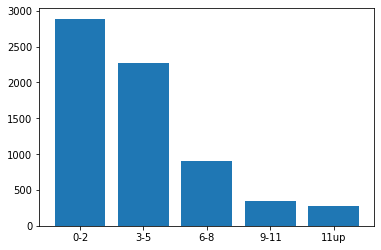

In [ ]:
import matplotlib.pyplot as plt
x_ray=['0-2','3-5','6-8','9-11','11up']
plt.bar(x_ray, compare, label = 'compare')


<BarContainer object of 5 artists>


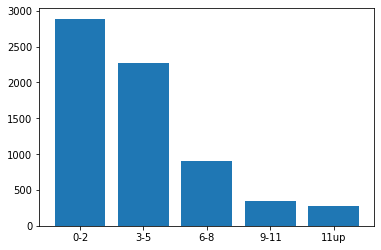

In [ ]:
print(plt.bar(x_ray, compare, label = 'compare'))